### Calculate confidence interval

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
# generate a sequence, arange(-5,5), interval is 0.01
x = np.arange(-5, 5, 0.01)

In [27]:
x = np.arange(-5, 5, 0.01)
x.std()

2.8867499025720336

In [5]:
# calculate the probability of each x value in standard normal distribution
y = norm.pdf(x)

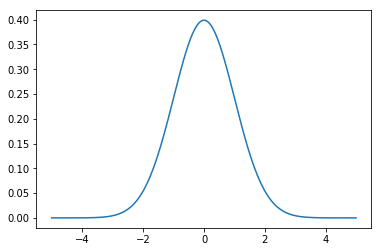

In [6]:
plt.plot(x, y)
plt.show()

In [14]:
# calculate confidence interval of 95%
config = 0.95
tail = (1-config)/2 
left_edge = norm.ppf(tail) # get the point value of 2.5% (one tail)
right_edge = norm.ppf(1-(1-config)/2)
print(left_edge, right_edge)

-1.959963984540054 1.959963984540054


confidence interval: [-1.959964, 1.959964]


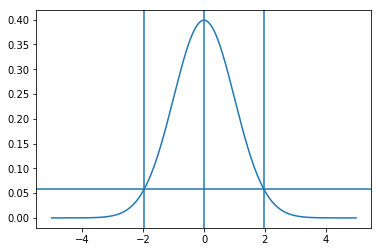

In [17]:
plt.plot(x, y)
# plt.show() remove plt.show, if you want all lines are in the same plot
plt.axvline(0) # vertical line x=0
plt.axvline(left_edge) # left tail: vertical line x=left_edge
plt.axvline(right_edge) # right tail: vertical line x=right_edge
plt.axhline(norm.pdf(edge)) # horizontal line
print("confidence interval: [%f, %f]" %(left_edge, right_edge)) # %f means float, %d is integer

### Calculate p-value

In [21]:
# calculate p-value of left tail
x = -2
p = norm.cdf(x)
print(p)

0.022750131948179195


In [22]:
# p-value of right tail
x = 2
p = 1 - norm.cdf(x)
print(p)

0.02275013194817921


In [23]:
# calculate p-value of double tail
x = 2
p = 2*(1-norm.cdf(x))
print(p)

0.04550026389635842


## Project: Hypothesis test
### One company produces wheels, the diameter of wheel is 5cm, the standard deviation is 1cm, assume the diameter of wheels is normal distribution. Recently the company produce some wheels, sampling 20 wheels, the diameter of these 20 wheels are shown below. How can we say the average diameter of these sample wheels is 5cm?

In [30]:
import numpy as np;
from scipy.stats import norm

#### H0: the average of wheel is 5cm 
#### H1: the average of wheel is not 5cm

In [32]:
# the diameter of 20 wheels
x = [4.89,5.99,5.89,6.22,4.79,
       5.47,4.5,6.61,4.25,6.67,
       4.46,4.5,6.97,5.39,4.56,
       5.03,2.54,5.27,4.48,4.05
]

mean_x = numpy.mean(x)
print(mean_x)

5.1265


In [34]:
# mean of wheels in population is 5, standard deviation is 1
u0 = 5
se = 1
# according to central limit theorem, mean of sampling should be u0, 
# the standard deviation of sampling mean is se/sqrt(len(x))
sample_mean = u0 = 5
sample_std = se/numpy.sqrt(len(x))
print(sample_mean, sample_std)

5 0.22360679774997896


#### Question: Is mean_x in the confidence inference (95% level) (sample_mean=5, sample_std=0.2236)

In [35]:
# standardization of mean_x
z = (mean_x - sample_mean)/sample_std
print(z)

0.565725198307447


In [36]:
# Calculate the confidence inference in 95% level (from knowledge, it is [-1.96, 1.96])
config = 0.95
left_tail = norm.ppf((1-config)/2)
right_tail = norm.ppf(1-(1-config)/2)
print(left_tail, right_tail)

-1.959963984540054 1.959963984540054


#### Because z=0.5657, which is in the region [-1.95996, 1.95996], so we cannot refuse H0, we can say the average of wheels is 5cm

In [38]:
# we can also calculate p-value
p = 2*(1-norm.cdf(z))
print(p) 

0.5715806028591985


#### Because p-value is bigger than 0.05, so we cannot refuse H0, we can say the average of wheels is 5cm

In [40]:
# calculate the confidence inference in 40% level, the region will be much smaller than in 95% level
config = 0.40
left_tail = norm.ppf((1-config)/2)
right_tail = norm.ppf(1-(1-config)/2)
print(left_tail, right_tail)

-0.5244005127080409 0.5244005127080407
